In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sce = 'Scenario 1'
if sce == 'Scenario 1':
    print('S1')
    x_pow, y_pow = 0.5, 2
elif sce == 'Scenario 2':
    print('S2')
    x_pow, y_pow = 4, 2
elif sce == 'Scenario 3':
    print('S3')
    x_pow, y_pow = 0.5, 0.5
elif sce == 'Scenario 4':
    print('S4')
    x_pow, y_pow = 2, 0.5
else:
    print('Not Supported Scenrio')

S1


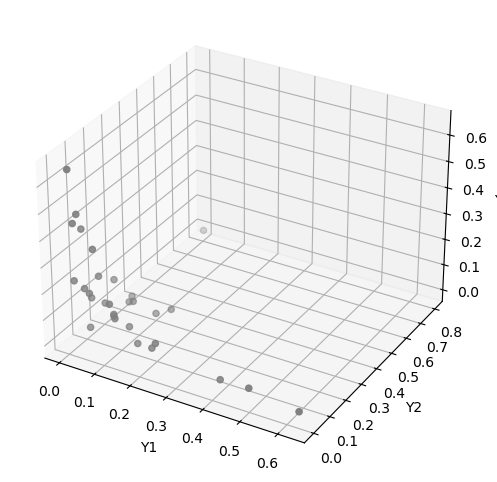

[[3.65974947e-02 2.71496765e-01 1.72859818e-02]
 [5.39610421e-02 1.91234226e-02 2.02002006e-01]
 [2.99936508e-02 1.17113963e-01 2.02622427e-01]
 [4.22696663e-02 1.61438419e-02 2.17314200e-01]
 [2.10934925e-02 2.19126758e-01 1.28358547e-01]
 [4.40567990e-02 3.75875175e-02 5.62380443e-02]
 [3.66689803e-02 1.36124131e-01 9.06991157e-02]
 [9.93680739e-02 6.15655773e-02 1.15928067e-01]
 [2.39306238e-01 1.23186283e-02 9.35940338e-02]
 [3.99162478e-01 4.83580646e-02 3.63626694e-03]
 [4.11359448e-03 7.97885174e-02 3.92505215e-01]
 [1.19525652e-01 1.06964997e-01 5.04002138e-02]
 [2.51184527e-02 8.47772014e-02 1.35544481e-01]
 [1.58566352e-01 7.44288706e-02 2.10829925e-02]
 [2.12068921e-01 4.69249694e-02 4.32641058e-02]
 [2.53939689e-02 3.11058670e-01 1.29227784e-02]
 [1.24899487e-01 1.77973261e-02 1.36254324e-01]
 [6.24764258e-01 1.53910157e-02 5.00767195e-03]
 [1.33961252e-01 3.20659541e-01 4.63159116e-04]
 [1.15668376e-01 2.68073777e-01 7.03593893e-03]
 [5.66528198e-02 1.43750355e-01 4.332079

In [33]:
def generate_data_with_custom_outputs(n_points, n_outputs, on_frontier_percentage, r, x_pow, y_pow, plotting=False):
    """
    Generate data points for a customizable number of outputs.

    :param n_points: Total number of points to generate.
    :param n_outputs: Number of output dimensions.
    :param on_frontier_percentage: Percentage of points that are on the production frontier.
    :param r: The radius or scale factor for the production possibility space.
    :return: A numpy array of generated points.
    """
    n_points_frontier = int(np.ceil(n_points * on_frontier_percentage))
    n_points_inside = n_points - n_points_frontier

    # Generate points inside the production possibility space
    points_inside = []
    for p in range(n_points_inside):
        while True:
            point = np.random.uniform(0, r, n_outputs)
            if np.sum(point**y_pow) <= r**x_pow:
                points_inside.append(point)
                break

    # Generate points on the production frontier
    points_frontier = []
    for _ in range(n_points_frontier):
        # Distribute r^2 among the outputs
        remaining = r**x_pow
        point = np.zeros(n_outputs)
        for i in range(n_outputs - 1):
            point[i] = np.random.uniform(0, remaining)
            remaining -= point[i]
        point[-1] = remaining  # Assign the remaining value to the last output
        np.random.shuffle(point)  # Shuffle to ensure random distribution among outputs
        points_frontier.append(point**(1 / y_pow))  # Take the square root to meet the frontier condition


    # Combine the points into a single array
    all_points = np.vstack((points_inside, points_frontier))
    
    if plotting and n_outputs==3:
        # Create a new 3D figure
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the points inside the shape
        ax.scatter(all_points[:, 0], all_points[:, 1], all_points[:, 2], color='gray')

    #     # Plot the points on the frontier
    #     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

        # Set labels
        ax.set_xlabel('Y1')
        ax.set_ylabel('Y2')
        ax.set_zlabel('Y3')

        # Show the plot
        plt.show()

    return all_points

# Example usage:
n_points = 30
n_outputs = 3  # For example, 4 outputs
on_frontier_percentage = 0.2
r = 1

data = generate_data_with_custom_outputs(n_points, n_outputs, on_frontier_percentage, r, x_pow=x_pow, y_pow=y_pow, plotting=True)
print(data)


In [34]:
df_data = pd.DataFrame(np.array(data).reshape(len(data),3), columns=['y1','y2','y3'])

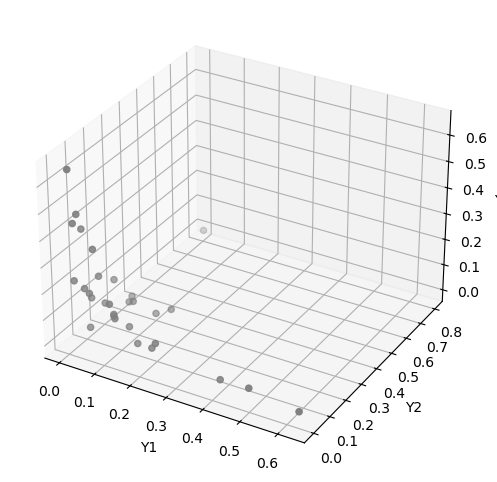

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df_data['y1'], df_data['y2'], df_data['y3'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')

# Show the plot
plt.show()

In [36]:
def gen_output_with_var_cost(n_points=10):
    # Define the radii
    all_output = []
    radius = np.linspace(0.01, 3, 3)
    print(radius, x_pow, y_pow)
    for r in radius:
        print('r=',r)
        level_output = generate_data_with_custom_outputs(n_points=n_points, n_outputs=3, on_frontier_percentage=0.333, 
                                                         r=r, x_pow=x_pow, y_pow=y_pow, plotting=True)
        all_output.append(level_output)
    return all_output

[0.01  1.505 3.   ] 0.5 0.5
r= 0.01


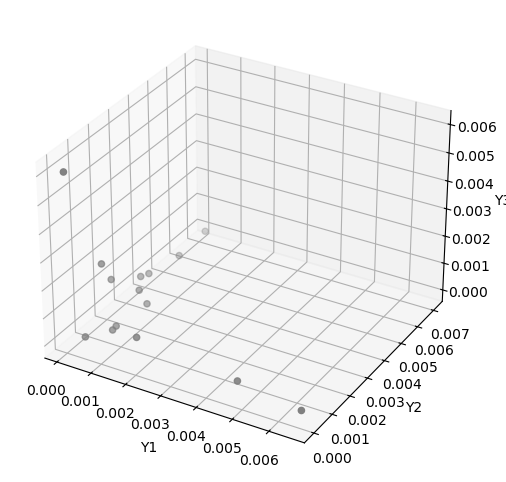

r= 1.5050000000000001


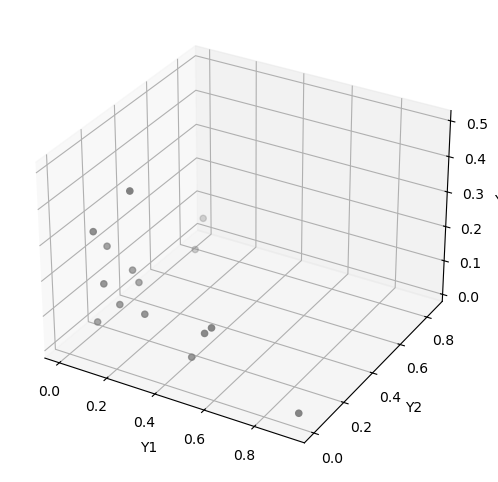

r= 3.0


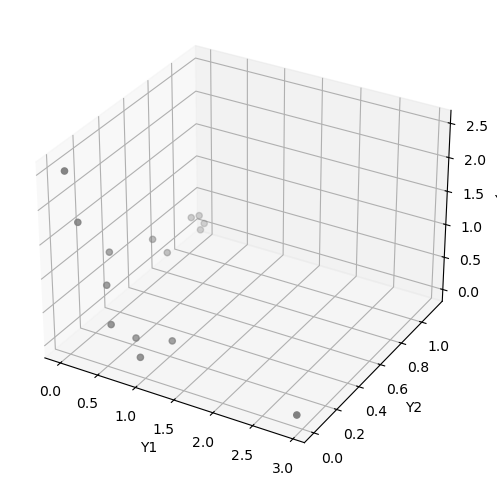

0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
0.010000000000000004
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996


In [37]:
all_output = gen_output_with_var_cost(n_points=15)
all_output_with_input = []
eff_mode = 'max'
for output in all_output:
    level_output_with_input = []
    for y1, y2, y3 in output:
        if eff_mode == 'max':
            eff = np.max([ (y2**y_pow + y1**y_pow + y3**y_pow)**(1/x_pow) for y1, y2, y3 in output])
        else:
            eff = 0
        print(eff)
        output_with_input = [y1, y2, y3, eff]
        level_output_with_input.append(output_with_input)
    all_output_with_input.append(level_output_with_input)

In [38]:
df = pd.DataFrame(np.array(all_output_with_input).reshape(len(all_output_with_input)*len(all_output_with_input[0]),4), columns=['y1','y2','y3','x'])
df.index = ['DMU ' + str(i) for i in df.index]
df

,y1,y2,y3,x
DMU 0,0.000109,9.365313e-07,0.006047,0.010
DMU 1,0.000818,9.076806e-04,0.000185,0.010
DMU 2,0.000164,2.001109e-03,0.001125,0.010
DMU 3,0.000266,3.762509e-03,0.000339,0.010
DMU 4,0.000679,1.321941e-03,0.000016,0.010
DMU 5,0.000624,2.625732e-03,0.000532,0.010
DMU 6,0.000817,2.678289e-03,0.000067,0.010
DMU 7,0.000520,6.051391e-05,0.000341,0.010
DMU 8,0.000255,3.351717e-03,0.000469,0.010
DMU 9,0.001897,2.666065e-04,0.000743,0.010


In [3]:
df = pd.read_csv('marginal_effect_analysis.csv')

In [4]:
df['real_x'] = (df['y2']**y_pow + df['y1']**y_pow + df['y3']**y_pow)**(1/x_pow)

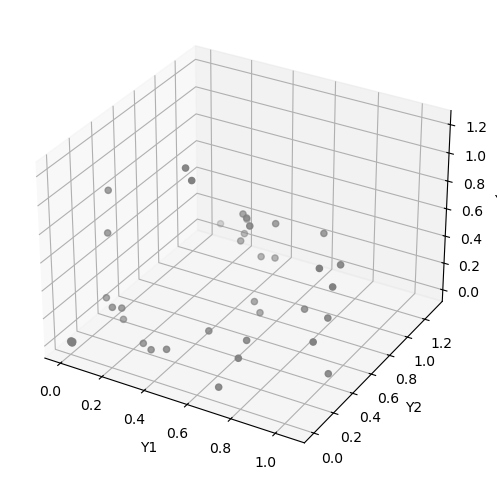

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df['y1'], df['y2'], df['y3'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')

# Show the plot
plt.show()

In [6]:
#%%
import dmp
import pandas as pd
import numpy as np
import constant as const
import solver
from load_data import denoise_nonpositive, LIFE141516, LIFE_DUMMY141516, LIFE181920
import time
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#%%

Restricted license - for non-production use only - expires 2025-11-24


In [7]:
transformed_df = df.copy()
transformed_df['class'] = transformed_df.groupby('x').ngroup()
# transformed_df = transformed_df[transformed_df['class']==1]
eff_dict, lambdas_dict, projected_x, projected_y =\
solver.dea_dual(dmu=transformed_df.index, 
                x=np.array(transformed_df[['x']].T), 
                y=np.array(transformed_df[['y1', 'y2', 'y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')

# HVI

In [8]:
from pymoo.indicators.hv import HV
from pymoo.problems import get_problem
import numpy as np
# Nested Approach
data = {
    'y1': projected_y[0],
    'y2': projected_y[1],
    'y3': projected_y[2],
    'class': transformed_df['class']
}

df_projected = pd.DataFrame(data)
df_test = df[['y1', 'y2']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    




RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


In [9]:
#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))


HV 0.30990712449805674
0.22484120194528645


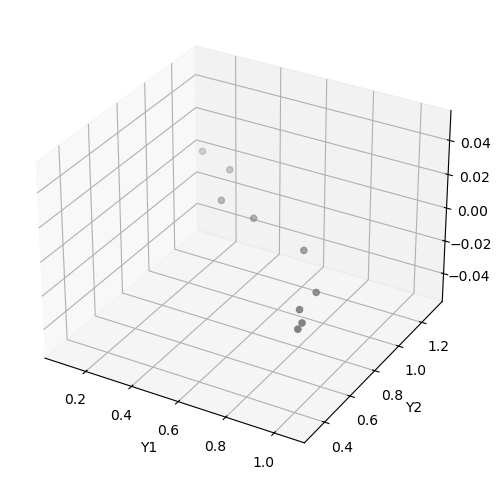

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df_plot['y1'], df_plot['y2'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
# ax.set_zlabel('Y3')

# Show the plot
plt.show()

# Y1-Y2 then Y3

In [11]:
df_test = df[['y1', 'y2']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 0.30990712449805674
0.22484120194528645


# Y2-Y3 then Y1

In [12]:
df_test = df[['y2', 'y3']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y2']].T)+10, 
                y=np.array(tmp_df[['y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y2','y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 0.6061931596687151
0.38254410400720046


# Y1-Y3 then Y2

In [13]:
df_test = df[['y1', 'y3']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
R

# Y1-Y2-Y3 HVI

In [50]:
df_test = df[['y1', 'y2', 'y3', 'x', 'real_x']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2', 'y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2', 'y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 0.5569622713382532
0.3339709307107801


In [51]:
df_test

,y1,y2,y3,x,real_x,frontier,index
0,0.002483,0.005361,0.007735,0.010,0.044519,4,0
1,0.008269,0.003280,0.002942,0.010,0.040986,4,1
2,0.007387,0.009170,0.004539,0.010,0.062040,4,2
3,0.000880,0.001745,0.009060,0.010,0.027763,5,3
4,0.007367,0.000587,0.003530,0.010,0.028724,5,4
5,0.002324,0.009047,0.001429,0.010,0.032808,5,5
6,0.009170,0.000547,0.001171,0.010,0.023527,4,6
7,0.003076,0.004685,0.009373,0.010,0.048718,4,7
8,0.007300,0.002847,0.004613,0.010,0.042732,4,8
9,0.001302,0.004731,0.001206,0.010,0.019488,6,9


In [52]:
input_levels = df_test['x'].unique()
frontier_levels = np.sort(df_test['frontier'].unique())
frontier_levels

array([0, 1, 2, 3, 4, 5, 6])

In [53]:
import statsmodels.formula.api as sm
# for x_level in input_levels:
for front in frontier_levels:
    # Filter data for the current input level and efficient observations
    # subset = df_plot[df_plot['x'] == x_level]
    subset = df_test[df_test['frontier'] == front]
    
    # print(subset)
    subset['minus_x'] = -subset['real_x']
    # Define the regression formula for three outputs
    formula = "minus_x ~  y1 + y2 + y3 + y1*y2 + y1*y3 + y2*y3"

    # Fit the OLS regression model
    model = sm.ols(formula, data=subset).fit()

    # Extract bij parameters and their p-values
    b12 = model.params["y1:y2"]
    p_value_b12 = model.pvalues["y1:y2"]

    b13 = model.params["y1:y3"]
    p_value_b13 = model.pvalues["y1:y3"]

    b23 = model.params["y2:y3"]
    p_value_b23 = model.pvalues["y2:y3"]

    # Print or store the results
    print(f"Frontier Level: {front}")
    print('Number of DMUs: ', subset.shape[0])
    print(f"Outputs y1 & y2: b12 = {b12:.4f}, p-value = {p_value_b12:.4f}")
    print(f"Outputs y1 & y3: b13 = {b13:.4f}, p-value = {p_value_b13:.4f}")
    print(f"Outputs y2 & y3: b23 = {b23:.4f}, p-value = {p_value_b23:.4f}")

Frontier Level: 0
Number of DMUs:  18
Outputs y1 & y2: b12 = -2.0909, p-value = 0.0893
Outputs y1 & y3: b13 = -1.4826, p-value = 0.2381
Outputs y2 & y3: b23 = -1.4770, p-value = 0.1899
Frontier Level: 1
Number of DMUs:  5
Outputs y1 & y2: b12 = -9.5953, p-value = nan
Outputs y1 & y3: b13 = -2.8844, p-value = nan
Outputs y2 & y3: b23 = -0.9134, p-value = nan
Frontier Level: 2
Number of DMUs:  8
Outputs y1 & y2: b12 = -7.0492, p-value = 0.0191
Outputs y1 & y3: b13 = 1.8584, p-value = 0.2218
Outputs y2 & y3: b23 = -24.6383, p-value = 0.0535
Frontier Level: 3
Number of DMUs:  4
Outputs y1 & y2: b12 = -0.3396, p-value = nan
Outputs y1 & y3: b13 = -2.0103, p-value = nan
Outputs y2 & y3: b23 = -0.3447, p-value = nan
Frontier Level: 4
Number of DMUs:  6
Outputs y1 & y2: b12 = -239.5007, p-value = nan
Outputs y1 & y3: b13 = -46.7711, p-value = nan
Outputs y2 & y3: b23 = 469.0204, p-value = nan
Frontier Level: 5
Number of DMUs:  3
Outputs y1 & y2: b12 = -0.0009, p-value = nan
Outputs y1 & y3: b1

# MRTS

In [54]:
fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

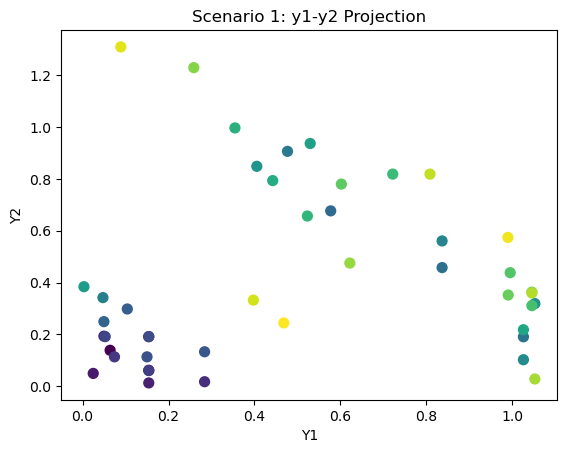

In [14]:
axis_1, axis_2 = projected_y[0], projected_y[1]
axis_1_name, axis_2_name = 'y1', 'y2'
sub_tdf = transformed_df[['y1', 'y2', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()`

# 顯示圖表
plt.show()

In [15]:
data = {
    'y1': sub_tdf[axis_1_name],
    'y2': sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

In [16]:
# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

,y1,y2,frontier,index
0,0.002483,0.005361,-1,0
1,0.008269,0.003280,-1,1
2,0.007387,0.009170,-1,2
3,0.000880,0.001745,-1,3
4,0.007367,0.000587,-1,4
5,0.002324,0.009047,-1,5
6,0.009170,0.000547,-1,6
7,0.003076,0.004685,-1,7
8,0.007300,0.002847,-1,8
9,0.001302,0.004731,-1,9


In [17]:
fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


Frontier 0
9 DMUs


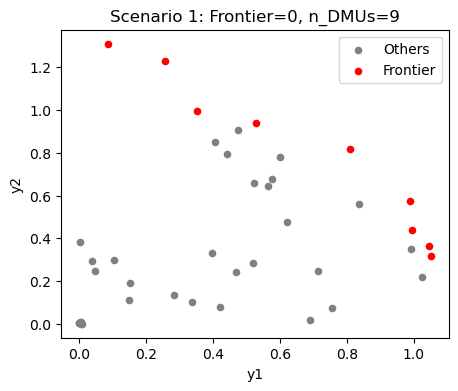

Frontier 1
5 DMUs


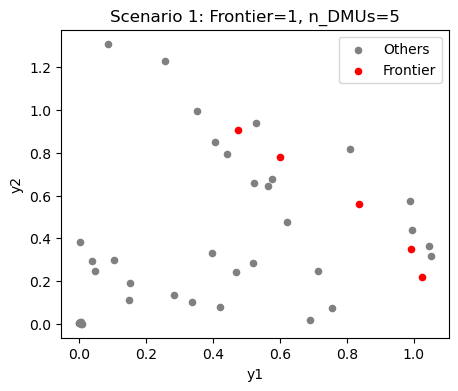

Frontier 2
6 DMUs


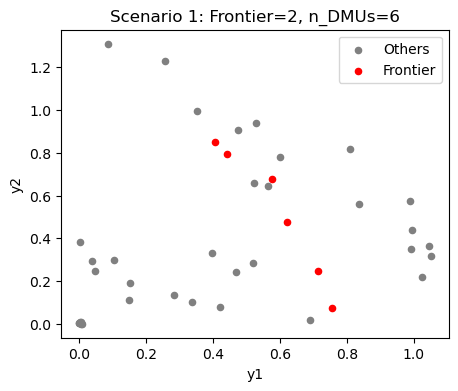

Frontier 3
3 DMUs


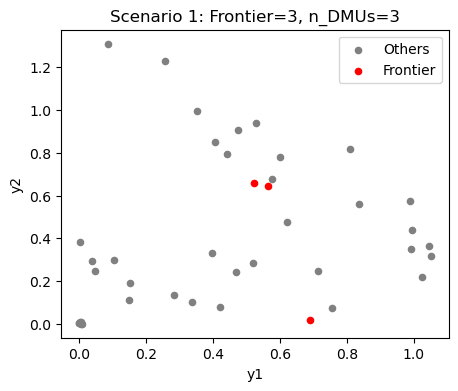

Frontier 4
3 DMUs


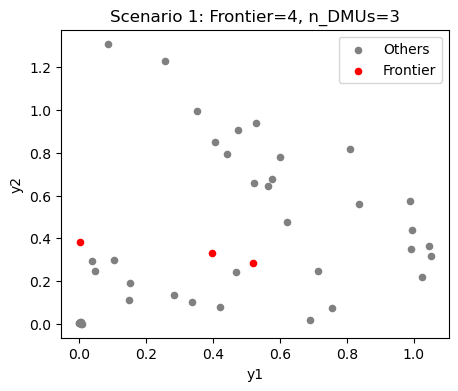

Frontier 5
2 DMUs


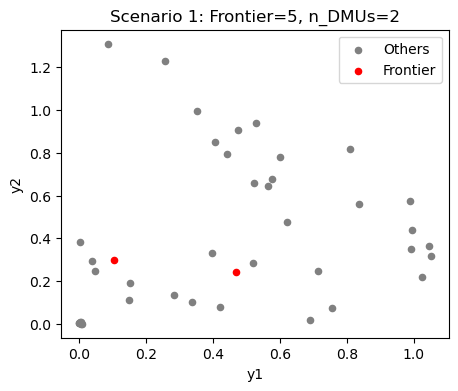

Frontier 6
6 DMUs


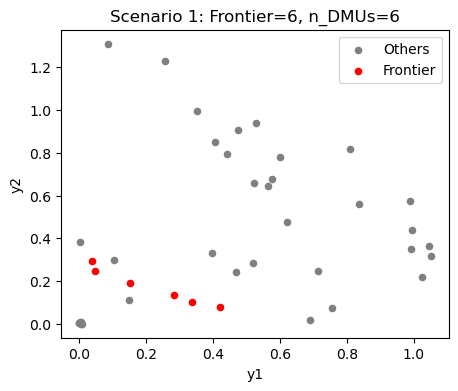

Frontier 7
1 DMUs


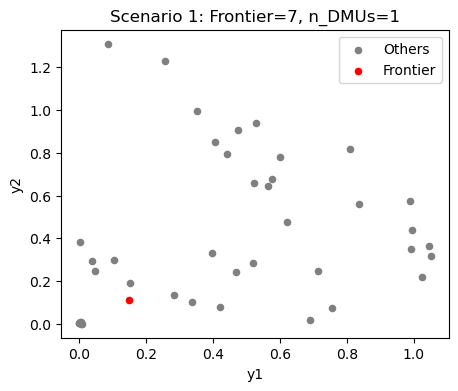

Frontier 8
3 DMUs


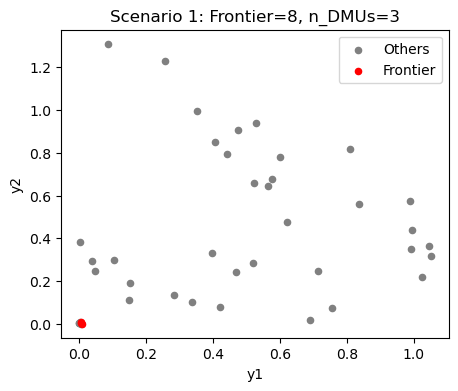

Frontier 9
5 DMUs


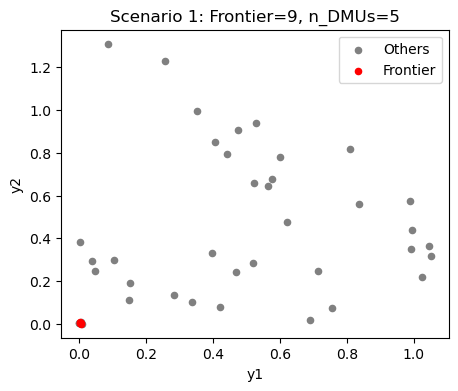

Frontier 10
1 DMUs


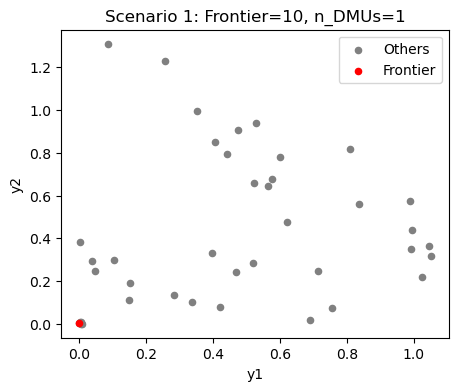

Frontier 11
1 DMUs


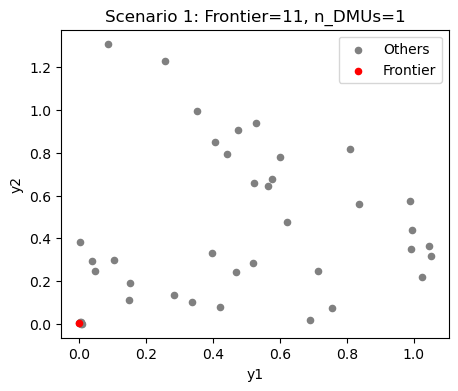

In [18]:
for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    

In [19]:
# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

Mean: -0.8365648161314249
Mean after removing extremes: -1.14288627432942
Median: -0.9237313829402551
Positive Return to Scope


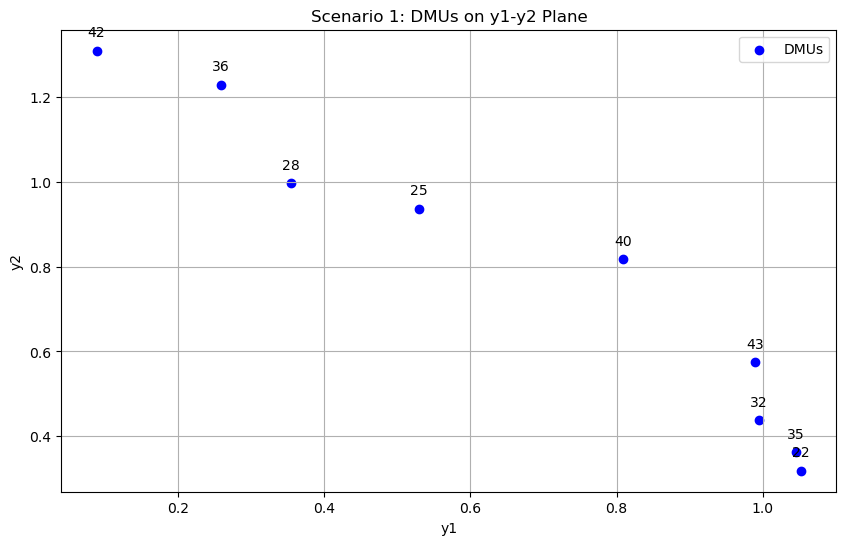

In [20]:
df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

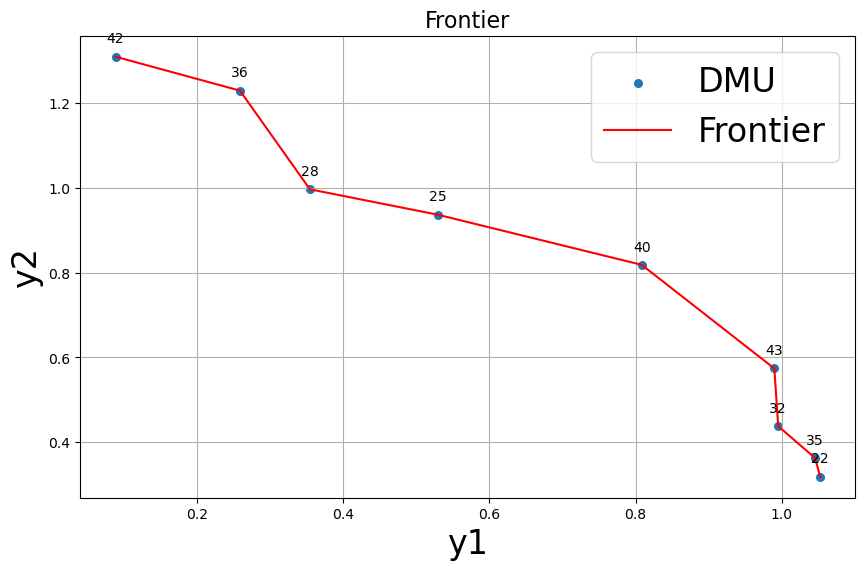

In [21]:
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y1'], df_sorted['y2'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y1'], df_sorted['y2'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y1', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y2', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y1'].iloc[i], df_sorted['y2'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputPos-1.png', dpi=300)
plt.show()


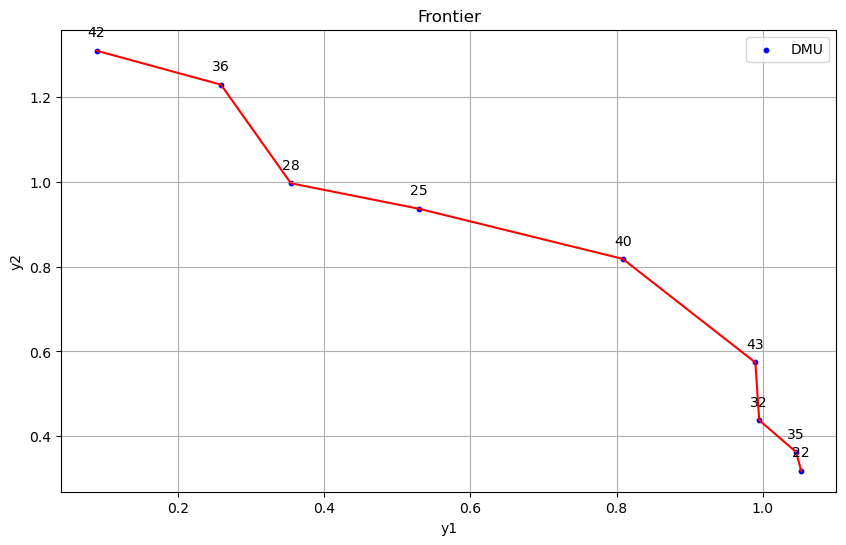

In [62]:
# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


In [63]:
# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


1.004169970960422
72.85369240664889


In [64]:
auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

DMU 0
0.0887822697699024 1.3096886705859652
RHS 0.2587915821282038 1.2296910920944026
Slope:  0.0 -0.4705482151646166
外凸
DMU 1
0.2587915821282038 1.2296910920944026
RHS 0.3544831544965882 0.996897467570046
Slope:  -0.4705482151646166 -2.432749496770412
外凸
DMU 2
0.3544831544965882 0.996897467570046
RHS 0.529590195388622 0.9368151823420152
Slope:  -2.432749496770412 -0.34311747215850635
內凹
DMU 3
0.529590195388622 0.9368151823420152
RHS 0.8083378075895458 0.818572287204335
Slope:  -0.34311747215850635 -0.4241933920224928
外凸
DMU 4
0.8083378075895458 0.818572287204335
RHS 0.989723970148157 0.5740773848561624
Slope:  -0.4241933920224928 -1.3479247749627479
外凸
DMU 5
0.989723970148157 0.5740773848561624
RHS 0.9949839806948808 0.4379298082339705
Slope:  -1.3479247749627479 -25.88351780149806
外凸
DMU 6
0.9949839806948808 0.4379298082339705
RHS 1.0454402667296954 0.3627778385034561
Slope:  -25.88351780149806 -1.4894471162356255
內凹
DMU 7
1.0454402667296954 0.3627778385034561
RHS 1.0524163619857805 

In [65]:
df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]

,y1,y2,scope
42,0.088782,1.309689,0.343065
36,0.258792,1.229691,0.384098
28,0.354483,0.996897,0.441486
25,0.529590,0.936815,0.048896
40,0.808338,0.818572,0.279823
43,0.989724,0.574077,0.329497
32,0.994984,0.437930,0.549927
35,1.045440,0.362778,0.248520
22,1.052416,0.318644,0.878344


In [66]:
df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

,type,scope
42,Positive,0.343065
36,Positive,0.384098
28,Negative,0.441486
25,Positive,0.048896
40,Positive,0.279823
43,Positive,0.329497
32,Negative,0.549927
35,Positive,0.248520
22,Positive,0.878344


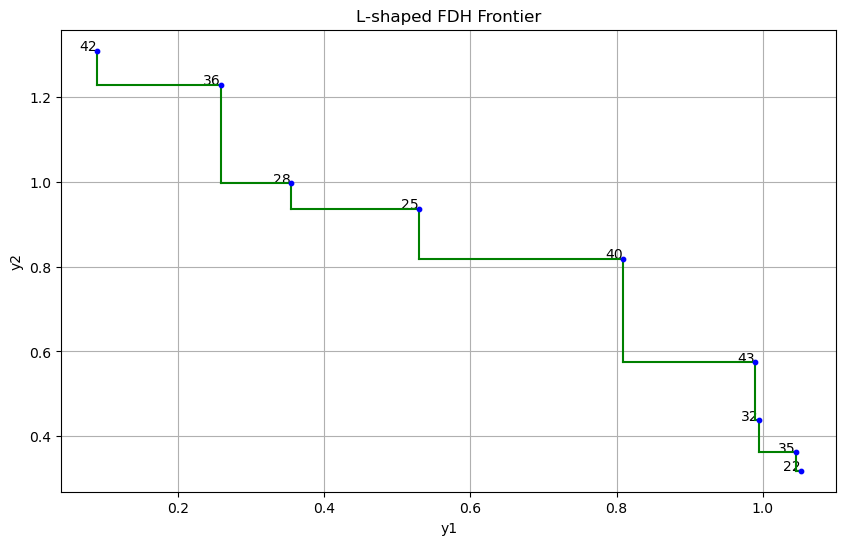

In [67]:
new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


In [68]:
auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

DMU 0
Slope:  0.0 -0.4705482151646166
外凸
DMU 1
Slope:  -0.4705482151646166 -2.432749496770412
外凸
DMU 2
Slope:  -2.432749496770412 -0.34311747215850635
內凹
DMU 3
Slope:  -0.34311747215850635 -0.4241933920224928
外凸
DMU 4
Slope:  -0.4241933920224928 -1.3479247749627479
外凸
DMU 5
Slope:  -1.3479247749627479 -25.88351780149806
外凸
DMU 6
Slope:  -25.88351780149806 -1.4894471162356255
內凹
DMU 7
Slope:  -1.4894471162356255 -6.3265019280845936
外凸
DMU 8
Slope:  -6.3265019280845936 -3.186435584153318e+49
外凸


In [69]:
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

68.19150500782641

In [70]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
42,42,Positive,0.343065,0.343065
36,36,Positive,0.384098,0.476208
28,28,Negative,0.441486,0.513978
25,25,Positive,0.048896,0.255829
40,40,Positive,0.279823,0.408323
43,43,Positive,0.329497,0.347598
32,32,Negative,0.549927,0.583505
35,35,Positive,0.248520,0.325045
22,22,Positive,0.878344,0.878344


In [71]:
print(auc_percentage)
print(auc_percentage_fdh)

72.85369240664889
68.19150500782641


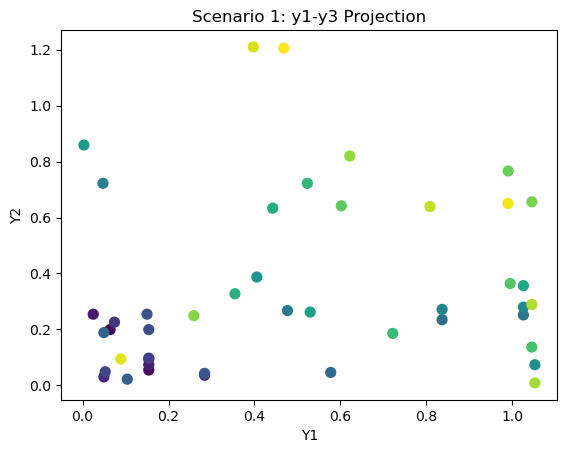

In [26]:
axis_1, axis_2 = projected_y[0], projected_y[2]
axis_1_name, axis_2_name = 'y1', 'y3'
sub_tdf = transformed_df[['y1', 'y3', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()

# 顯示圖表
plt.show()

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
Frontier 0
6 DMUs


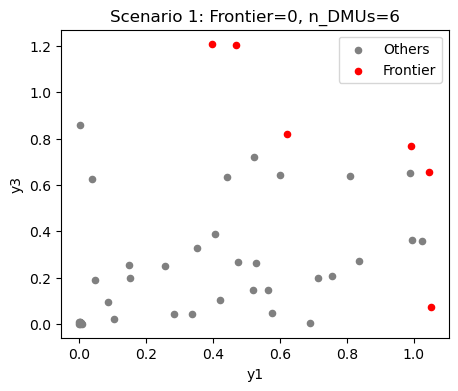

Mean: -20.851234334536066
Mean after removing extremes: -2.15442761016336
Median: -2.15442761016336
Positive Return to Scope


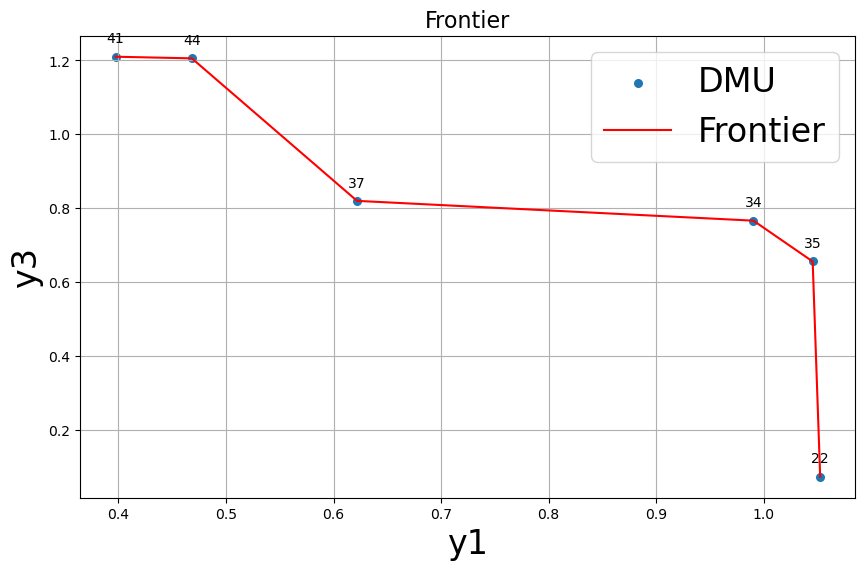

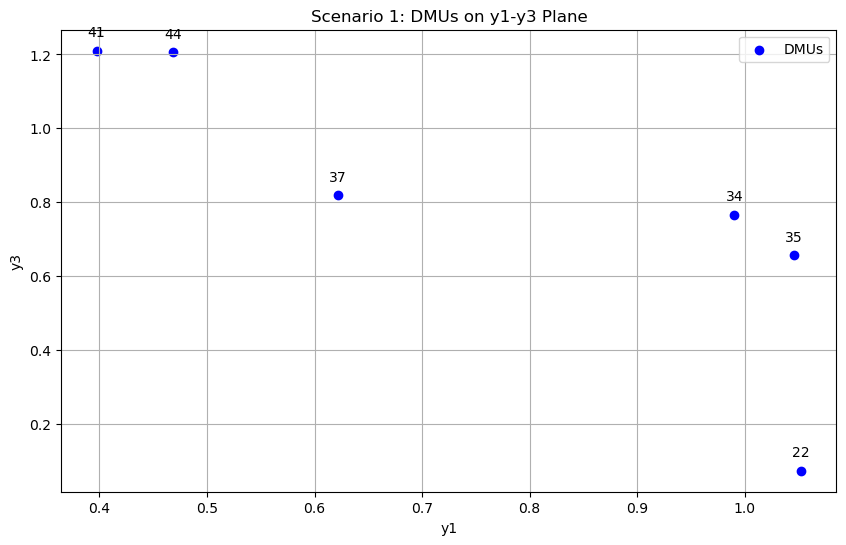

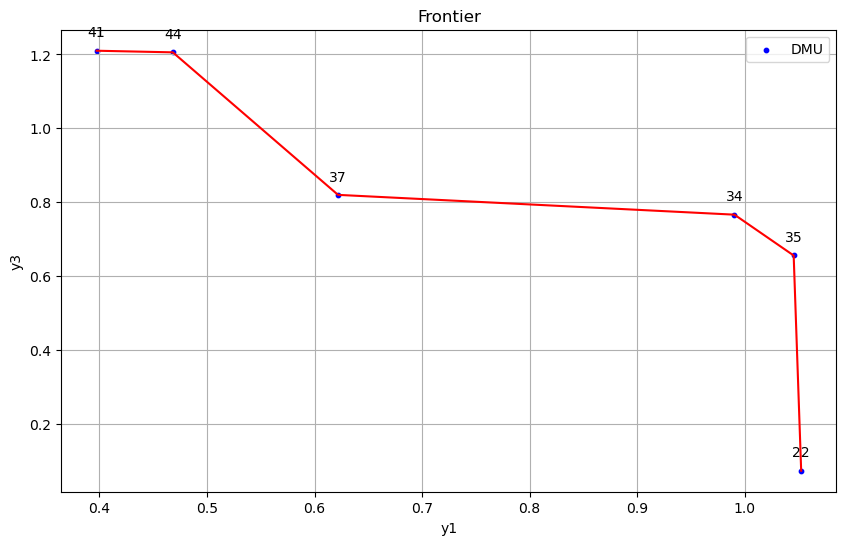

1.0559573057425007
82.92726070028232
DMU 0
0.3973716957982924 1.2099333512355297
RHS 0.4682301485108967 1.205536185618167
Slope:  0.0 -0.062055625673865834
外凸
DMU 1
0.4682301485108967 1.205536185618167
RHS 0.6218198566365042 0.8199702043245191
Slope:  -0.062055625673865834 -2.5103633960833336
外凸
DMU 2
0.6218198566365042 0.8199702043245191
RHS 0.9903661573937352 0.7664016779780937
Slope:  -2.5103633960833336 -0.1453508724313911
內凹
DMU 3
0.9903661573937352 0.7664016779780937
RHS 1.0454402667296954 0.6559286144562455
Slope:  -0.1453508724313911 -2.005898322348643
外凸
DMU 4
1.0454402667296954 0.6559286144562455
RHS 1.0524163619857805 0.0736549208016644
Slope:  -2.005898322348643 -83.46699296381813
外凸
DMU 5
1.0524163619857805 0.0736549208016644
RHS 1.0524163619857805 0
Slope:  -83.46699296381813 -7.36549208016644e+48
外凸


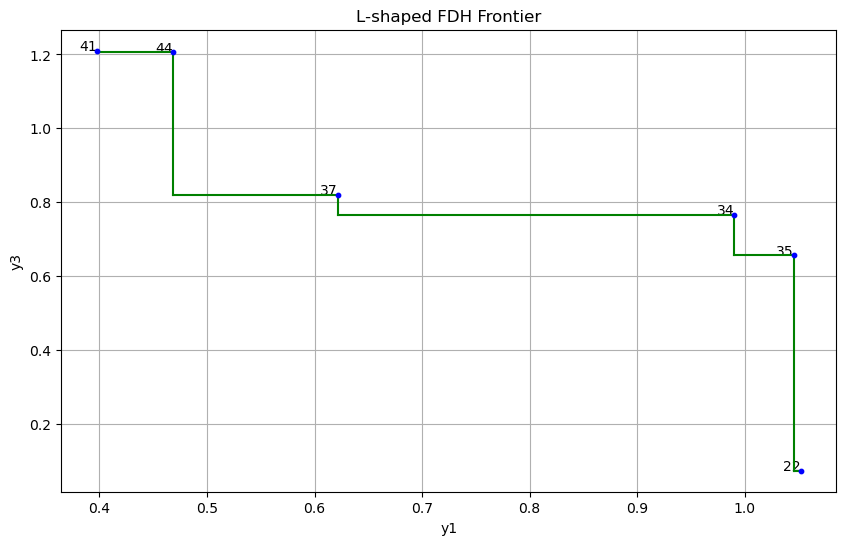

DMU 0
Slope:  0.0 -0.062055625673865834
外凸
DMU 1
Slope:  -0.062055625673865834 -2.5103633960833336
外凸
DMU 2
Slope:  -2.5103633960833336 -0.1453508724313911
內凹
DMU 3
Slope:  -0.1453508724313911 -2.005898322348643
外凸
DMU 4
Slope:  -2.005898322348643 -83.46699296381813
外凸
DMU 5
Slope:  -83.46699296381813 -7.36549208016644e+48
外凸


79.4160905304251

In [27]:
data = {
    'y1': sub_tdf[axis_1_name],
    'y3': sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    break

# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y1'], df_sorted['y3'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y1'], df_sorted['y3'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y1', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y3', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y1'].iloc[i], df_sorted['y3'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputPos-2.png', dpi=300)
plt.show()

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]


df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

In [74]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
41,41,Positive,0.848667,0.848667
44,44,Positive,0.304425,0.312141
37,37,Negative,0.583857,0.619740
34,34,Positive,0.543437,0.585892
35,35,Positive,0.728102,0.746031
22,22,Positive,0.112291,0.112291


In [75]:
print(auc_percentage)
print(auc_percentage_fdh)

82.92726070028232
79.4160905304251


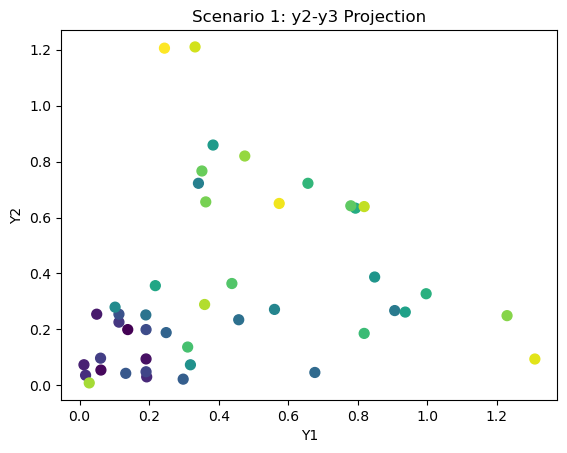

In [24]:
axis_1, axis_2 = projected_y[1], projected_y[2]
axis_1_name, axis_2_name = 'y2', 'y3'
sub_tdf = transformed_df[['y2', 'y3', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()

# 顯示圖表
plt.show()

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
Frontier 0
10 DMUs


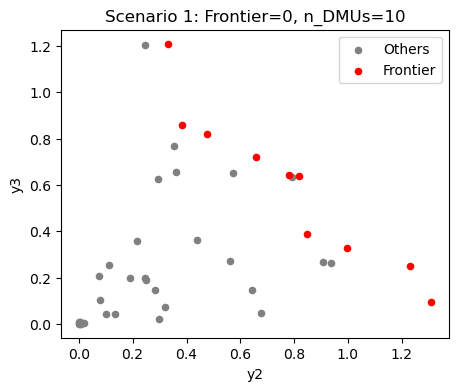

Mean: 0.6042803736315909
Mean after removing extremes: 0.8608731367113174
Median: -0.019848481870761242
Negative Return to Scope


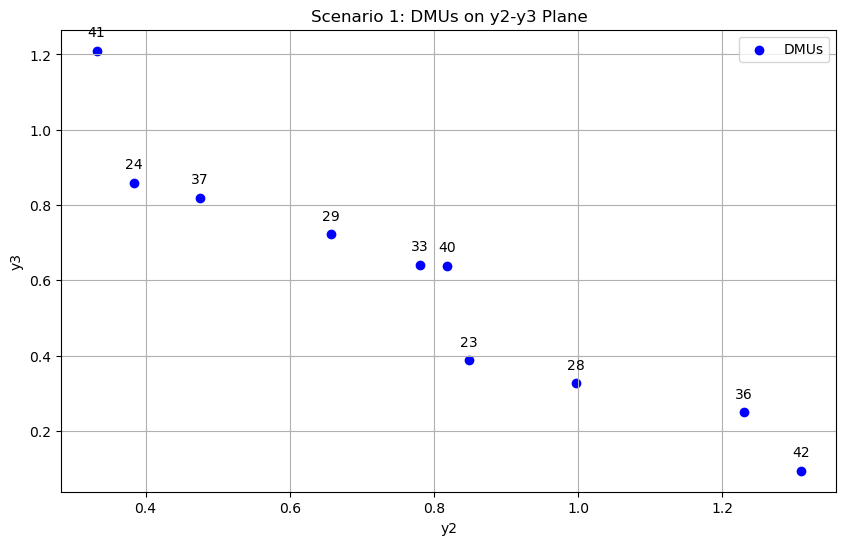

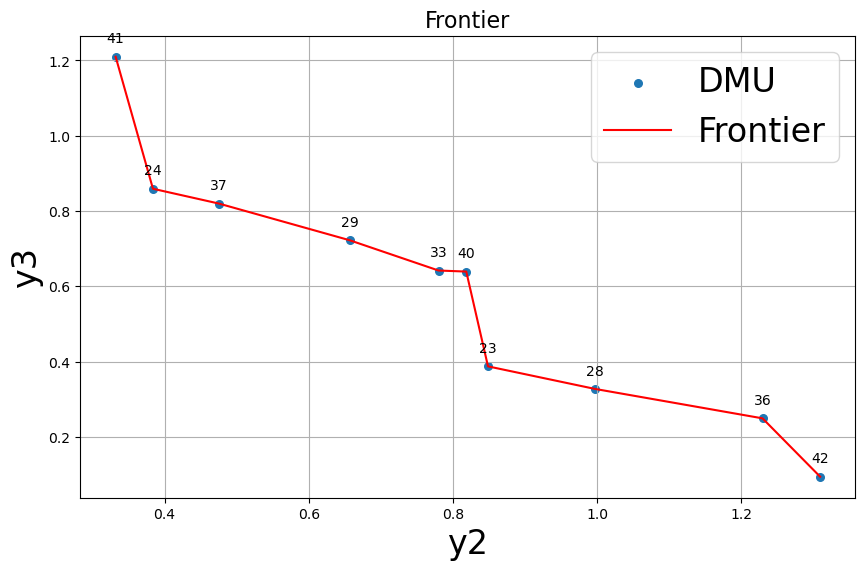

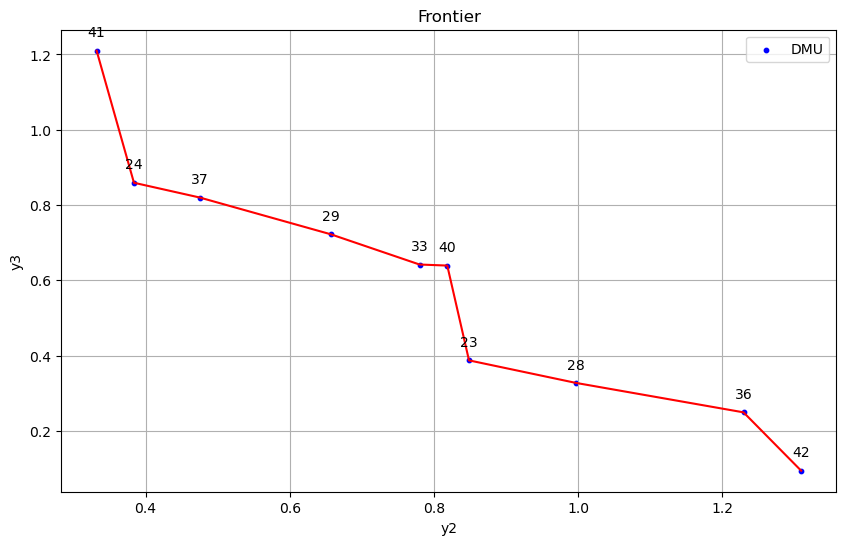

0.9301538023393042
58.69826262956155
DMU 0
0.3319756444608964 1.2099333512355297
RHS 0.3837608353524965 0.8592112153859622
Slope:  0.0 -6.772633832396606
外凸
DMU 1
0.3837608353524965 0.8592112153859622
RHS 0.4750486901753039 0.8199702043245191
Slope:  -6.772633832396606 -0.4298601510311664
內凹
DMU 2
0.4750486901753039 0.8199702043245191
RHS 0.6567568024234003 0.7224144820394197
Slope:  -0.4298601510311664 -0.5368814913001846
外凸
DMU 3
0.6567568024234003 0.7224144820394197
RHS 0.7801112313880486 0.641994358142193
Slope:  -0.5368814913001846 -0.6519435465124163
外凸
DMU 4
0.7801112313880486 0.641994358142193
RHS 0.818572287204335 0.6392027902092321
Slope:  -0.6519435465124163 -0.07258167706823015
內凹
DMU 5
0.818572287204335 0.6392027902092321
RHS 0.8487167168635462 0.387402093006807
Slope:  -0.07258167706823015 -8.353141859012815
外凸
DMU 6
0.8487167168635462 0.387402093006807
RHS 0.996897467570046 0.3275996748611132
Slope:  -8.353141859012815 -0.4035775082834064
內凹
DMU 7
0.996897467570046 0.327

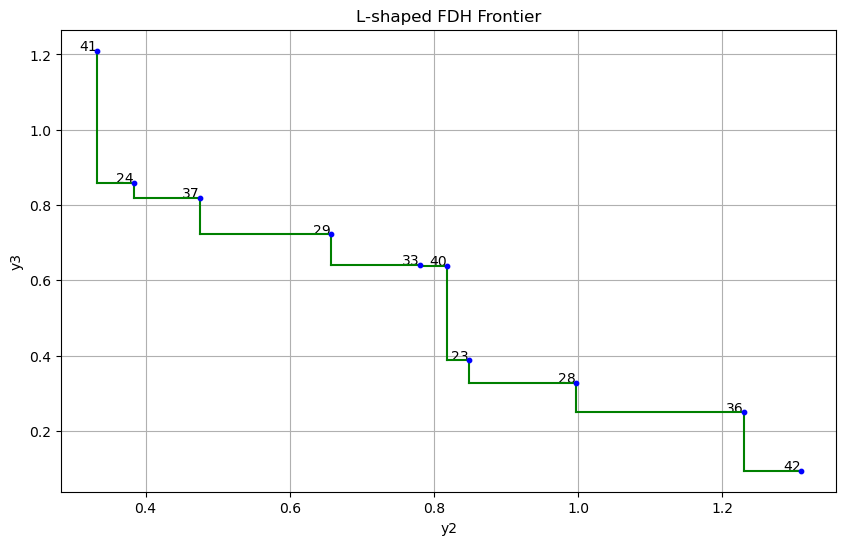

DMU 0
Slope:  0.0 -6.772633832396606
外凸
DMU 1
Slope:  -6.772633832396606 -0.4298601510311664
內凹
DMU 2
Slope:  -0.4298601510311664 -0.5368814913001846
外凸
DMU 3
Slope:  -0.5368814913001846 -0.6519435465124163
外凸
DMU 4
Slope:  -0.6519435465124163 -0.07258167706823015
內凹
DMU 5
Slope:  -0.07258167706823015 -8.353141859012815
外凸
DMU 6
Slope:  -8.353141859012815 -0.4035775082834064
內凹
DMU 7
Slope:  -0.4035775082834064 -0.3362531317559107
內凹
DMU 8
Slope:  -0.3362531317559107 -1.9383908433438775
外凸
DMU 9
Slope:  -1.9383908433438775 -9.42555159242608e+48
外凸


55.65093565984316

In [25]:
data = {
    axis_1_name: sub_tdf[axis_1_name],
    axis_2_name: sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    break

# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y2'], df_sorted['y3'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y2'], df_sorted['y3'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y2', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y3', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y2'].iloc[i], df_sorted['y3'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputPos-3.png', dpi=300)
plt.show()

# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]


df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

In [78]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
41,41,Positive,0.865059,0.865059
24,24,Negative,0.537423,0.573845
37,37,Positive,0.047536,0.238470
29,29,Positive,0.047502,0.269147
33,33,Negative,0.204137,0.229711
40,40,Positive,0.549647,0.554465
23,23,Negative,0.639040,0.671482
28,28,Negative,0.044148,0.264645
36,36,Positive,0.408786,0.494581
42,42,Positive,0.378047,0.378047


In [79]:
print(auc_percentage)
print(auc_percentage_fdh)

58.69826262956155
55.65093565984316


In [80]:
df_sorted

,y2,y3,frontier,index,scope,overall_scope,type,FDH_scope
41,0.331976,1.209933,0,41,0.865059,0.586983,Positive,0.865059
24,0.383761,0.859211,0,24,0.537423,0.586983,Negative,0.573845
37,0.475049,0.819970,0,37,0.047536,0.586983,Positive,0.238470
29,0.656757,0.722414,0,29,0.047502,0.586983,Positive,0.269147
33,0.780111,0.641994,0,33,0.204137,0.586983,Negative,0.229711
40,0.818572,0.639203,0,40,0.549647,0.586983,Positive,0.554465
23,0.848717,0.387402,0,23,0.639040,0.586983,Negative,0.671482
28,0.996897,0.327600,0,28,0.044148,0.586983,Negative,0.264645
36,1.229691,0.249322,0,36,0.408786,0.586983,Positive,0.494581
42,1.309689,0.094256,0,42,0.378047,0.586983,Positive,0.378047


In [81]:
import statsmodels.formula.api as sm

df_test

,y2,y3,frontier,index
0,0.005361,0.007735,-1,0
1,0.003280,0.002942,-1,1
2,0.009170,0.004539,-1,2
3,0.001745,0.009060,-1,3
4,0.000587,0.003530,-1,4
5,0.009047,0.001429,-1,5
6,0.000547,0.001171,-1,6
7,0.004685,0.009373,-1,7
8,0.002847,0.004613,-1,8
9,0.004731,0.001206,-1,9
